In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("..\Datasets\\1_earthquake_1995-2023.csv")

In [28]:
df.head()

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,...,magType,depth,latitude,longitude,location,continent,country,day,month,year
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,7,4,green,0,657,us,114,7.177000,...,mww,192.955,-13.88,167.16,"Sola, Vanuatu",Oceania,Vanuatu,16,8,2023
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,8,6,yellow,0,775,us,92,0.679000,...,mww,69.727,12.81,-88.13,"Intipucá, El Salvador",North America,El Salvador,19,7,2023
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,7,5,green,0,899,us,70,1.634000,...,mww,171.371,-38.19,-70.37,"Loncopué, Argentina",South America,Argentina,17,7,2023
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,6,6,green,1,860,us,173,0.907000,...,mww,32.571,54.38,-160.70,"Sand Point, Alaska",North America,United States,16,7,2023
4,M 7.3 - Alaska Peninsula,7.3,0,5,NaN,1,820,at,79,0.879451,...,Mi,21.000,54.49,-160.80,Alaska Peninsula,North America,United States,16,7,2023


In [29]:
df[df["alert"].isna()].head()

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,...,magType,depth,latitude,longitude,location,continent,country,day,month,year
4,M 7.3 - Alaska Peninsula,7.3,0,5,NaN,1,820,at,79,0.879451,...,Mi,21.0,54.49,-160.80,Alaska Peninsula,North America,United States,16,7,2023
62,"M 6.5 - 71 km SE of Nikolski, Alaska",6.5,0,3,NaN,1,650,at,97,1.616070,...,Mi,37.0,52.50,-168.08,"Nikolski, Alaska",North America,United States,11,1,2022
63,"M 6.5 - 71 km SE of Nikolski, Alaska",6.5,0,3,NaN,1,650,pt,23,0.000000,...,Mi,37.0,52.50,-168.08,"Nikolski, Alaska",North America,United States,11,1,2022
65,"M 6.7 - 91 km SE of Nikolski, Alaska",6.7,0,4,NaN,1,691,at,50,0.936943,...,Mi,33.0,52.48,-167.74,"Nikolski, Alaska",North America,United States,11,1,2022
66,"M 6.7 - 91 km SE of Nikolski, Alaska",6.7,0,4,NaN,1,691,pt,20,0.000000,...,Mi,33.0,52.48,-167.74,"Nikolski, Alaska",North America,United States,11,1,2022


# EDA

## Alert with CDI 

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_cdi = df[["cdi","alert"]].fillna("unknown")

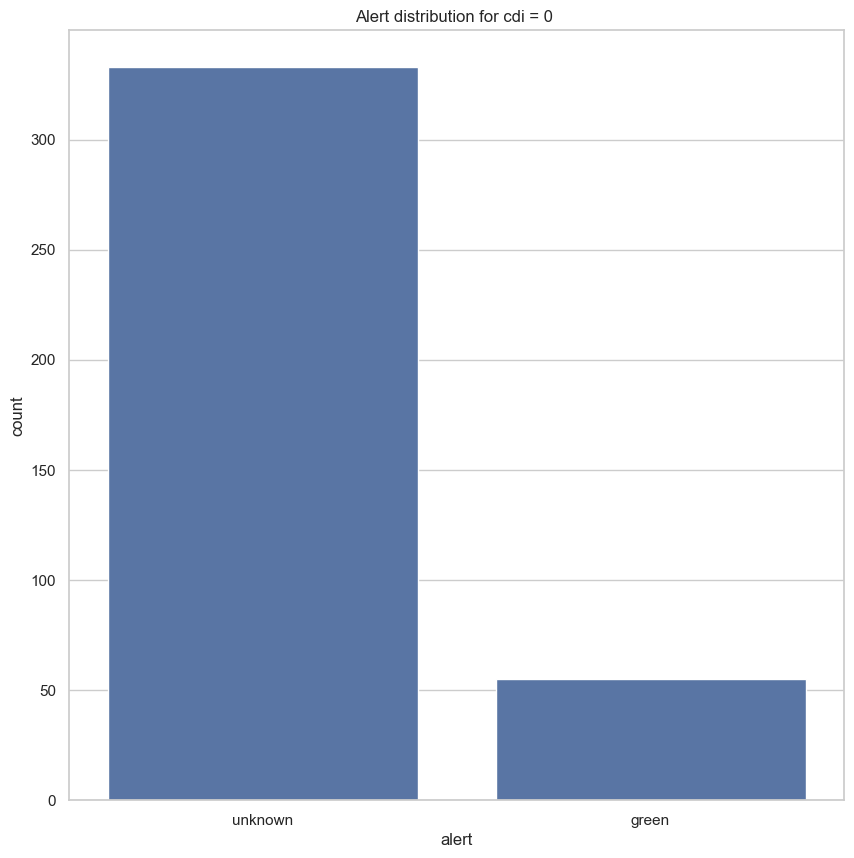

In [32]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (10,10))
sns.countplot(x = "alert",data = df_cdi[df_cdi["cdi"]==0])

plt.title("Alert distribution for cdi = 0 ")
plt.show()

As we can see that for cmi = 0 (which means no community reported an earthquake) above 300 values are null in alert column, so it is safe to replace null values with "No alert" for cmi = 0.

In [33]:
df.loc[df['cdi'] == 0, 'alert'] = df.loc[df['cdi'] == 0, 'alert'].fillna('No alert')

In [34]:
alert_count = df_cdi.groupby(['cdi', 'alert']).size().reset_index(name='count')

In [35]:
alert_count

,cdi,alert,count
0,0,green,55
1,0,unknown,333
2,1,green,12
3,2,green,11
4,2,unknown,2
5,3,green,27
6,3,unknown,18
7,3,yellow,1
8,4,green,36
9,4,unknown,27


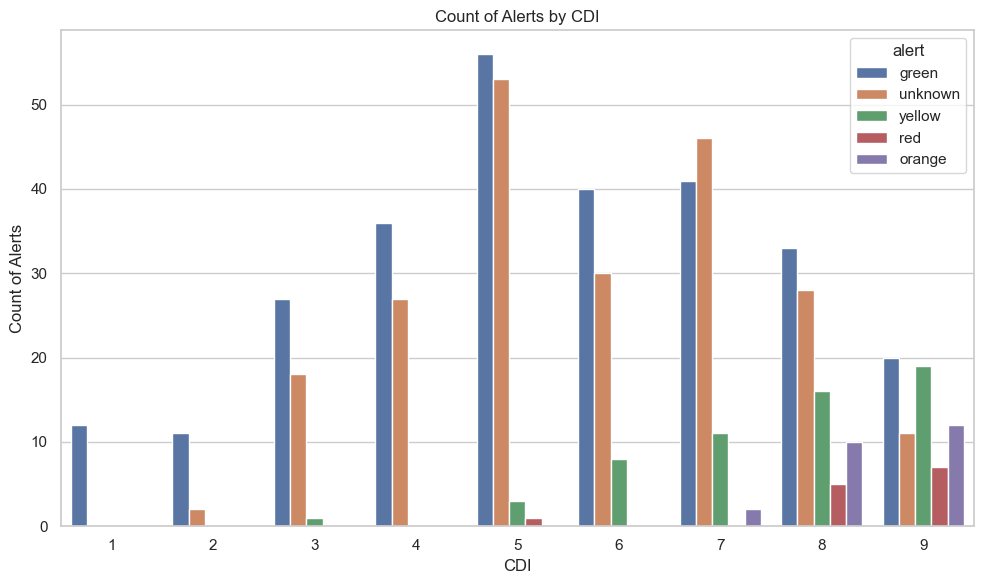

In [36]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='cdi', y='count', hue='alert', data=alert_count[alert_count["cdi"]!=0])

# Customize the plot
plt.title('Count of Alerts by CDI')
plt.xlabel('CDI')
plt.ylabel('Count of Alerts')

# Show the plot
plt.tight_layout()
plt.show()


## Alert with sig

In [37]:
df_al_sig = df[["sig","alert"]].fillna("unknown")
df_al_sig

,sig,alert
0,657,green
1,775,yellow
2,899,green
3,860,green
4,820,No alert
...,...,...
969,776,No alert
970,912,No alert
971,732,No alert
972,670,No alert


In [38]:
df_al_sig_mean= df_al_sig.groupby("alert").mean().reset_index()
df_al_sig_mean

,alert,sig
0,No alert,743.375375
1,green,776.181269
2,orange,1374.041667
3,red,2508.461538
4,unknown,919.441860
5,yellow,1014.706897


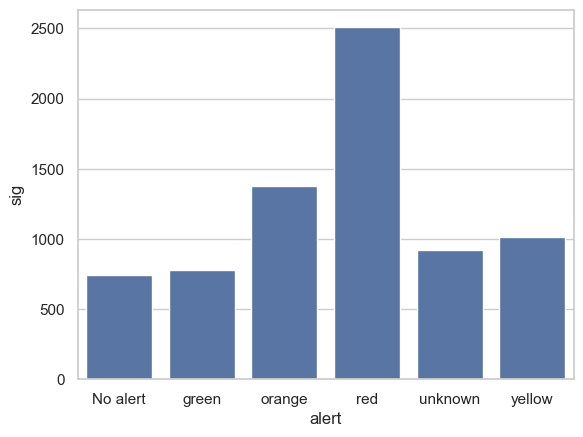

In [39]:
sns.barplot(x="alert",y="sig",data=df_al_sig_mean);

## Alert with CDI = 1,2,3,4,5,6,7 and sig and Tsunami

In [40]:
df_al_sig_Tsu = df[df['cdi'].isin([1, 2, 3, 4,5,6,7])][['tsunami', 'alert',"cdi"]].fillna("unknown")

In [41]:
df_al_sig_Tsu

,tsunami,alert,cdi
0,0,green,7
2,0,green,7
3,1,green,6
5,1,green,5
6,1,green,4
...,...,...,...
691,0,unknown,5
710,0,unknown,7
771,0,unknown,6
780,0,unknown,7


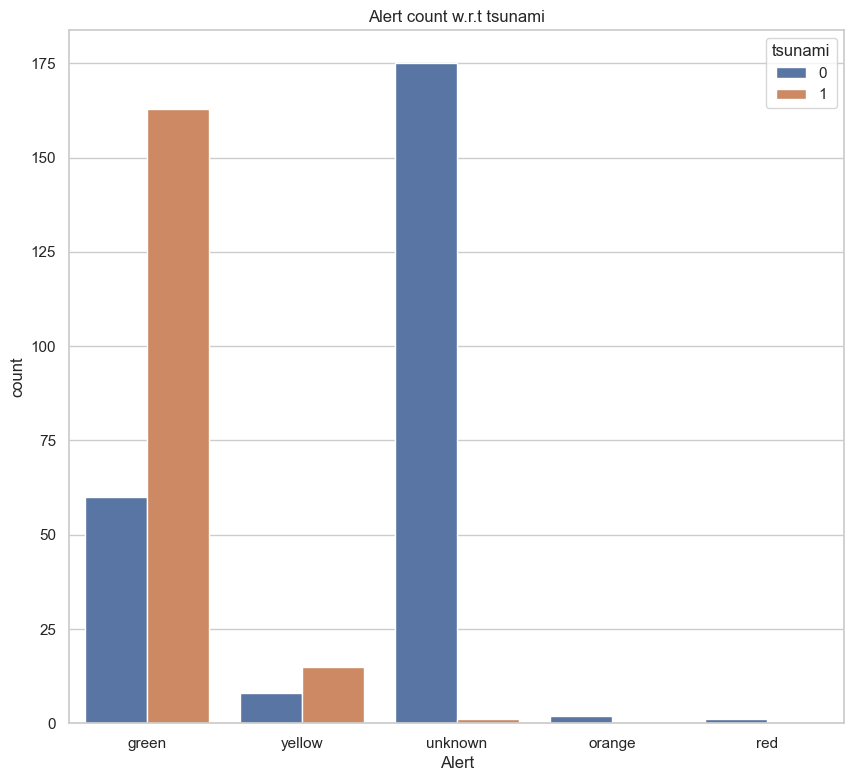

In [42]:
plt.figure(figsize=[10,9])

sns.countplot(x='alert',data=df_al_sig_Tsu,hue ="tsunami")
plt.xlabel("Alert")
plt.title("Alert count w.r.t tsunami")
plt.show()

More than 40 values for 'unknown' did not have a tsunami implying there was no alert issued

In [43]:
df_sig_mean = df_al_sig_Tsu[df_al_sig_Tsu["tsunami"] == 0].groupby(["cdi", "alert"]).size().reset_index(name="count")

df_sig_mean


,cdi,alert,count
0,1,green,1
1,2,green,2
2,2,unknown,1
3,3,green,8
4,3,unknown,18
5,3,yellow,1
6,4,green,16
7,4,unknown,27
8,5,green,15
9,5,red,1


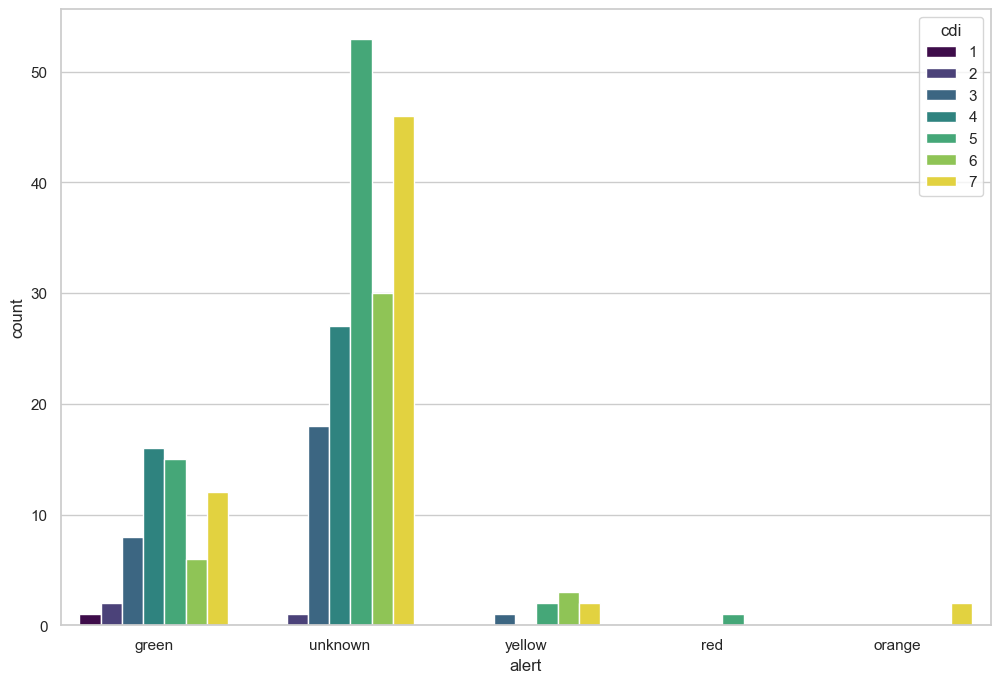

In [44]:
plt.figure(figsize=(12,8))

sns.barplot(x="alert", y="count", hue="cdi", data=df_sig_mean, palette="viridis")  # You can change "viridis" to any palette you like

plt.show()


## Alert with magnitude

In [45]:
data_1 = df.fillna("unknown").groupby("alert")["magnitude"].mean().reset_index()
data_1

,alert,magnitude
0,No alert,6.936787
1,green,6.855891
2,orange,7.125000
3,red,7.323077
4,unknown,6.997674
5,yellow,7.006897


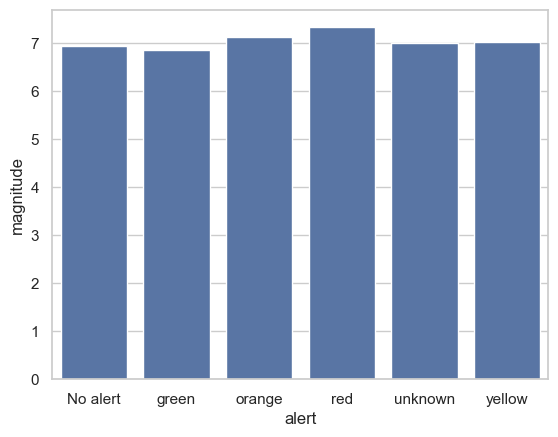

In [46]:
sns.barplot(x="alert",y="magnitude",data = data_1);

As we can see all the values are really close to each other thus we cant draw any conclusion out of this

In [47]:
data_1 = df.fillna("unknown").groupby("cdi")["magnitude"].mean().reset_index()
data_1

,cdi,magnitude
0,0,6.911727
1,1,6.858333
2,2,6.730769
3,3,6.765217
4,4,6.852381
5,5,6.884956
6,6,6.870513
7,7,6.904000
8,8,7.128261
9,9,7.272464


In [48]:
df.loc[(df['cdi'].isin([1, 2, 3, 4,5])) & (df['tsunami'] == 0), 'alert'] = df.loc[
    (df['cdi'].isin([1, 2, 3, 4,5])) & (df['tsunami'] == 0), 'alert'
].fillna('No alert')


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      974 non-null    object 
 1   magnitude  974 non-null    float64
 2   cdi        974 non-null    int64  
 3   mmi        974 non-null    int64  
 4   alert      858 non-null    object 
 5   tsunami    974 non-null    int64  
 6   sig        974 non-null    int64  
 7   net        974 non-null    object 
 8   nst        974 non-null    int64  
 9   dmin       974 non-null    float64
 10  gap        974 non-null    float64
 11  magType    974 non-null    object 
 12  depth      974 non-null    float64
 13  latitude   974 non-null    float64
 14  longitude  974 non-null    float64
 15  location   974 non-null    object 
 16  continent  974 non-null    object 
 17  country    974 non-null    object 
 18  day        974 non-null    int64  
 19  month      974 non-null    int64  
 20  year      

In [50]:
output_file = "../Datasets/2_earthquake_1995-2023.csv"
df.to_csv(output_file, index=False)